In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# 如果執行錯誤，代表可能沒有將people"在雲端硬碟中新增捷徑"
! ls /content/drive/My\ Drive/people/

 01.jpg		      people	     yolov4.conv.137
 cfg		      weights	     YOLOv4_person.ipynb
 crowdhuman	      weights_tiny  'YOLOv4_person.ipynb (yu_chih)'
 darknet	      yolos
 label_person.ipynb   yolos_person


In [ ]:
# 簡單測試資料及是否可以存取成功
! cat /content/drive/My\ Drive/people/crowdhuman/273271,1a0d6000b9e1f5b7.txt

cat: '/content/drive/My Drive/people/crowdhuman/273271,1a0d6000b9e1f5b7.txt': Input/output error


## 檢查GPU型號

In [ ]:
# check NVIDIA GPU
! nvidia-smi

Thu Aug 27 08:51:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 設定路徑

In [ ]:
# /Darknet
LOCAL_DARKNET_PATH = "/content/darknet"
# /people
GDRIVE_PEOPLE_PATH = "/content/drive/My\ Drive/people"
GDRIVE_PEOPLE_PATH_py = "/content/drive/My Drive/people"
# config
GDRIVE_YOLO_CFG_PATH = "/content/drive/My\ Drive/people/cfg"
GDRIVE_YOLO_CFG_PATH_py = "/content/drive/My Drive/people/cfg"
# Data
GDRIVE_YOLO_DATA_PATH = "/content/drive/My\ Drive/people/yolos_person"
GDRIVE_YOLO_DATA_PATH_py = "/content/drive/My Drive/people/yolos_person"
GDRIVE_CROWD_DATA_PATH = "/content/drive/My\ Drive/people/crowdhuman"
GDRIVE_CROWD_DATA_PATH_py = "/content/drive/My Drive/people/crowdhuman"
# Output weights
GDRIVE_WEIGHTS_PATH = "/content/drive/My\ Drive/people/weights"
GDRIVE_WEIGHTS_PATH_py = "/content/drive/My Drive/people/weights"
GDRIVE_WEIGHTS_TINY_PATH = "/content/drive/My\ Drive/people/weights_tiny"
GDRIVE_WEIGHTS_TINY_PATH_py = "/content/drive/My Drive/people/weights_tiny"
# Output log
GDRIVE_LOG_PATH = "/content/drive/My\ Drive/people/log"
GDRIVE_LOG_PATH_py = "/content/drive/My Drive/people/log"

## 下載 Darknet (AlexeyAB 版本)

In [ ]:
! git clone https://github.com/AlexeyAB/darknet.git
!head darknet/Makefile

fatal: destination path 'darknet' already exists and is not an empty directory.
GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [ ]:
# 調整參數
! sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile

! head darknet/Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



# 指定訓練/測試資料
* 在 /cfg 建立 `train.txt` , `test.txt`

In [ ]:
# 若檔案存在則先刪除
! rm {GDRIVE_YOLO_CFG_PATH}/train_tiny.txt
! rm {GDRIVE_YOLO_CFG_PATH}/test_tiny.txt
! ls -al {GDRIVE_YOLO_CFG_PATH}

import os
datasets = [GDRIVE_CROWD_DATA_PATH_py + '/' + f for f in os.listdir(GDRIVE_CROWD_DATA_PATH_py) if f.endswith('.jpg')]
split_boundary = int(len(datasets) * 0.8)

print("訓練資料數：", split_boundary)

rm: cannot remove '/content/drive/My Drive/people/cfg/train_tiny.txt': No such file or directory
rm: cannot remove '/content/drive/My Drive/people/cfg/test_tiny.txt': No such file or directory
total 232
-rw------- 1 root root    135 Aug 15 17:36  obj-cat17.data
-rw------- 1 root root     69 Aug 13 17:26  obj-cat17.names
-rw------- 1 root root     95 Aug 13 11:53  obj.data
-rw------- 1 root root      7 Aug 13 11:50  obj.names
-rw------- 1 root root    123 Aug 15 17:30  obj-person.data
-rw------- 1 root root      7 Aug 23 13:07  obj-person.names
-rw------- 1 root root    143 Aug 27 08:55  obj-person_tiny.data
-rw------- 1 root root      7 Aug 27 08:54  obj-person_tiny.names
-rw------- 1 root root  19094 Aug 23 12:51  test.txt
-rw------- 1 root root 171455 Aug 23 12:51  train.txt
-rw------- 1 root root  12496 Aug 13 17:41  yolov4-cat17.cfg
-rw------- 1 root root  12260 Aug 13 10:59  yolov4-custom.cfg
-rw------- 1 root root  12493 Aug 13 17:41  yolov4-person.cfg
-rw------- 1 root root    1

In [ ]:
with open(GDRIVE_YOLO_CFG_PATH_py + '/' + 'train_tiny.txt', 'w') as f:
    f.write('\n'.join(datasets[0:split_boundary]))

with open(GDRIVE_YOLO_CFG_PATH_py + '/' + 'test_tiny.txt', 'w') as f:
    f.write('\n'.join(datasets[split_boundary:]))

# 查看 train.txt
! head /content/drive/My\ Drive/people/cfg/train_tiny.txt
# 查看 test.txt
! head /content/drive/My\ Drive/people/cfg/test_tiny.txt

/content/drive/My Drive/people/crowdhuman/273278,d950f0001fd6e831.jpg
/content/drive/My Drive/people/crowdhuman/282555,1110380000f8c8548.jpg
/content/drive/My Drive/people/crowdhuman/273275,507930007830462b.jpg
/content/drive/My Drive/people/crowdhuman/273275,129cea000e4d1dc0a.jpg
/content/drive/My Drive/people/crowdhuman/283554,2cd1000094c469f0.jpg
/content/drive/My Drive/people/crowdhuman/273278,6bcdc00008c3e6f1.jpg
/content/drive/My Drive/people/crowdhuman/284193,19a95000944fe910.jpg
/content/drive/My Drive/people/crowdhuman/273275,e12af00023e2f786.jpg
/content/drive/My Drive/people/crowdhuman/284193,26aaf000a5f9e6d7.jpg
/content/drive/My Drive/people/crowdhuman/283554,3a7110003dc5b0bf.jpg
/content/drive/My Drive/people/crowdhuman/273275,770bf000183252ff.jpg
/content/drive/My Drive/people/crowdhuman/273275,8aee3000f82b57c8.jpg
/content/drive/My Drive/people/crowdhuman/273278,8c21c000a3f4561b.jpg
/content/drive/My Drive/people/crowdhuman/273278,1a9a1000abe030f9.jpg
/content/drive/My 

#### 編譯 YOLOv4

In [ ]:
! cd darknet; make

### 確認檔案與路徑

In [ ]:
! cat /content/drive/My\ Drive/people/cfg/obj-person_tiny.data

class= 1
train=/people/cfg/train_tiny.txt
valid=/people/cfg/test_tiny.txt
names=/people/cfg/obj-person_tiny.names
backup=/people/weights_tiny/


In [ ]:
# 將google drive裡的people/建立一個捷徑!指到這台主機的最上層，同名路徑people

! ln -s /content/drive/My\ Drive/people .

In [ ]:
! ls /content/people/cfg

 obj-cat17.data		 train_tiny.txt
 obj-cat17.names	 train.txt
 obj.data		 yolov4-cat17.cfg
 obj.names		 yolov4-custom.cfg
 obj-person.data	 yolov4-person.cfg
 obj-person.names	 yolov4-person.cfg.gdoc
 obj-person_tiny.data	'yolov4-tiny-custom (1).cfg.gdoc'
 obj-person_tiny.names	 yolov4-tiny-custom.cfg
 test_tiny.txt		 yolov4-tiny-custom.cfg.gdoc
 test.txt


In [ ]:
# final check

# !ls -A1 /content/people/cfg
!cat /content/people/cfg/obj-person_tiny.data
# !cat /content/people/cfg/obj-person.names

class= 1
train=/people/cfg/train_tiny.txt
valid=/people/cfg/test_tiny.txt
names=/people/cfg/obj-person_tiny.names
backup=/people/weights_tiny/


In [ ]:
# 列出現有的weights
! ls -al /content/people/weights_tiny

total 0


### 以下擇一執行訓練

In [ ]:
# (1) 使用pre-trained weights - 訓練單一類別 person
! darknet/darknet detector train {GDRIVE_YOLO_CFG_PATH}/obj-person_tiny.data {GDRIVE_YOLO_CFG_PATH}/yolov4-person_tiny.cfg yolov4-tiny.conv.29 -dont_show | grep "avg loss"

# (2) 使用最後一次訓練產生的weights - 訓練單一類別 person
# ! darknet/darknet detector train {GDRIVE_YOLO_CFG_PATH}/obj-person_tiny.data {GDRIVE_YOLO_CFG_PATH}/yolov4-person_tiny.cfg {GDRIVE_WEIGHTS_TINY_PATH}/yolov4-person_tiny_last.weights -dont_show | grep "avg loss"

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 route  8 2 	                           ->  208 x 208 x 128 
  10 conv   

# 測試訓練結果

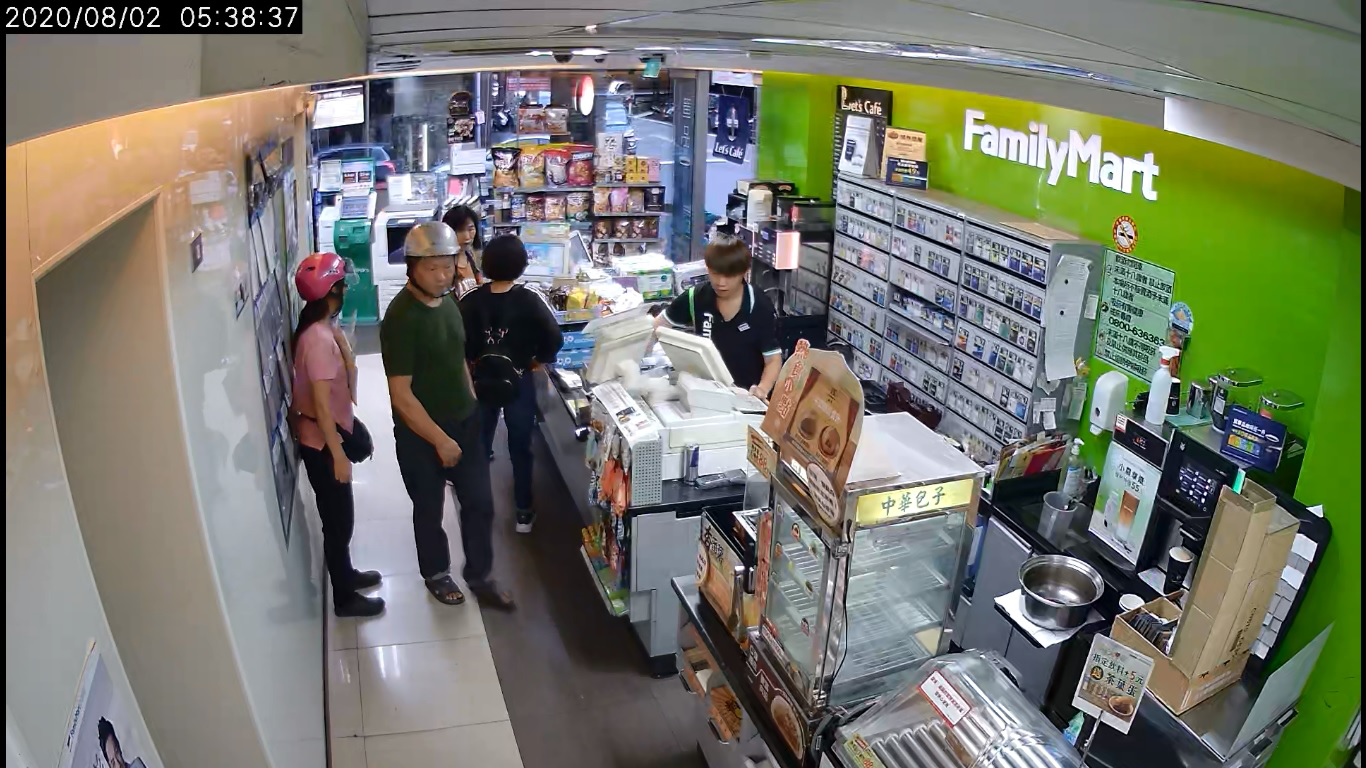

In [ ]:
# 找一張圖
from PIL import Image
Image.open('/content/people/01.jpg')

In [ ]:
# 進行辨識(最後一個參數要改成圖片所在路徑+檔名)
! cd darknet; ./darknet detector test /content/people/cfg/obj-person_tiny.data  /content/people/cfg/yolov4-person_tiny.cfg /content/people/weights_tiny/yolov4-person_tiny_last.weights /content/drive/My Drive/content/people/01.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Couldn't open file: /people/cfg/obj-person.names


In [ ]:
# 看圖變標註結果
from PIL import Image
Image.open('/content/darknet/predictions.jpg')

FileNotFoundError: ignored